# Regression

In [2]:
import numpy as np
import pandas as pd
from preprocess import Visualization
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# read data
data = pd.read_csv(r'C:\Users\user\Documents\NSYSU\BigData\Project2\outputs\各產業日最大值_新增特徵後_正規化.csv',encoding='utf-8')

In [4]:
data.head()

,max_temp,min_temp,mean_temp,Max_SthPres,Min_StnPres,Min_RH,Mean_StnPres,Mean_RH,Mean_Precp,Mean_WD,...,spring,summer,fall,winter,holiday,石化業該日最高用電量,金屬製造該日最高用電量,資訊電子該日最高用電量,綜合服務該日最高用電量,民生工業該日最高用電量
0,0.673684,0.503846,0.557857,0.027637,0.998196,0.545455,0.660376,0.024141,0.001912,0.002025,...,0,0,0,1,0,0.622311,0.456662,0.584242,0.060494,0.477941
1,0.671053,0.465385,0.609071,0.028413,0.998050,0.532468,0.582111,0.024381,0.001912,0.002445,...,0,0,0,1,0,0.789035,0.536662,0.640956,0.074545,0.836889
2,0.673684,0.523077,0.629022,0.024825,0.998074,0.610390,0.578102,0.301957,0.000201,0.010433,...,0,0,0,1,0,0.804558,0.557253,0.632406,0.075817,0.875184
3,0.642105,0.576923,0.607415,0.023176,0.997855,0.649351,0.655563,0.035065,0.027921,0.004373,...,0,0,0,1,0,0.820313,0.539131,0.635813,0.076252,0.873371
4,0.631579,0.553846,0.565569,0.022885,0.997514,0.935065,0.654731,0.037666,0.018742,0.001304,...,0,0,0,1,0,0.809138,0.577511,0.629515,0.075532,0.873817


In [5]:
data.columns

Index(['max_temp', 'min_temp', 'mean_temp', 'Max_SthPres', 'Min_StnPres',
       'Min_RH', 'Mean_StnPres', 'Mean_RH', 'Mean_Precp', 'Mean_WD',
       'Mean_WDGust', 'Mean_WS', 'Mean_WSGust', 'Mean_WS_log', 'spring',
       'summer', 'fall', 'winter', 'holiday', '石化業該日最高用電量', '金屬製造該日最高用電量',
       '資訊電子該日最高用電量', '綜合服務該日最高用電量', '民生工業該日最高用電量'],
      dtype='object')

## LR

In [6]:
from sklearn.model_selection import KFold

# Define the number of splits (k)
num_splits = 5  # You can adjust this value as needed

# get input variables and target variables
features = ['max_temp', 'min_temp', 'mean_temp', 'Mean_Precp', 'Mean_WS_log', 'spring', 'summer', 'fall', 'winter',
       'holiday']
targets = ['石化業該日最高用電量', '資訊電子該日最高用電量', '民生工業該日最高用電量']

x = data[features]
y = data[targets]

# split data
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=1/3, random_state=42)

# create model
model = LinearRegression()

# train model
model.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)

# evaluate
print('MSE: ', mean_squared_error(y_test, y_pred, multioutput='raw_values'))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred, multioutput='raw_values')))
print('MAE: ', mean_absolute_error(y_test, y_pred, multioutput='raw_values'))
print('R2: ', r2_score(y_test, y_pred, multioutput='raw_values'))

MSE:  [0.00313228 0.00578932 0.00915494]
RMSE:  [0.05596678 0.0760876  0.09568146]
MAE:  [0.04014737 0.06516289 0.0619081 ]
R2:  [0.51638184 0.18296953 0.66864157]


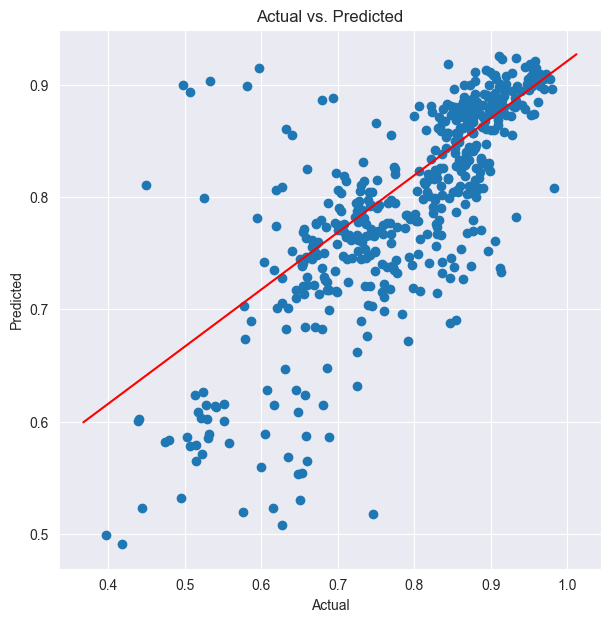

In [7]:
Visualization.plot_regression(y_test, y_pred)

## Lasso Regression

In [8]:
# Lasso Regression
from sklearn.linear_model import Lasso

# Define the number of splits (k)
num_splits = 5  # You can adjust this value as needed

# get input variables and target variables
features = ['max_temp', 'min_temp', 'mean_temp', 'Mean_Precp', 'Mean_WS_log', 'spring', 'summer', 'fall', 'winter',
       'holiday']
targets = ['石化業該日最高用電量', '資訊電子該日最高用電量', '民生工業該日最高用電量']


x = data[features]
y = data[targets]

# split data
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=1/3, random_state=42)


# create lasso regression model
lasso = Lasso(alpha=0.1)

# train model
lasso.fit(x_train, y_train)

# predict
y_pred = lasso.predict(x_test)

# evaluate
print('MSE: ', mean_squared_error(y_test, y_pred, multioutput='raw_values'))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred, multioutput='raw_values')))
print('MAE: ', mean_absolute_error(y_test, y_pred, multioutput='raw_values'))
print('R2: ', r2_score(y_test, y_pred, multioutput='raw_values'))


MSE:  [0.00648198 0.00710421 0.02765262]
RMSE:  [0.08051076 0.0842865  0.16629078]
MAE:  [0.06626772 0.06943468 0.14801202]
R2:  [-0.00080574 -0.00259728 -0.0008725 ]


In [9]:
# Assuming y_test and y_pred are your actual and predicted values

# Create scatter plot
sns.set_style("darkgrid")
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

# Add regression line
axes = plt.gca()
m, b = np.polyfit(y_test.iloc[:,0], y_pred[:,0], 1)
X_plot = np.linspace(axes.get_xlim()[0], axes.get_xlim()[1], 100)
plt.plot(X_plot, m*X_plot + b, '-', color='red')
plt.show()

NameError: name 'sns' is not defined

## Polynomial Regression

In [ ]:
# Polynomial Regression\
from sklearn.preprocessing import PolynomialFeatures

# Define the number of splits (k)
num_splits = 5  # You can adjust this value as needed

# get input variables and target variables
features = ['max_temp', 'min_temp', 'mean_temp', 'Mean_Precp', 'Mean_WS_log', 'spring', 'summer', 'fall', 'winter',
       'holiday']
targets = ['石化業該日最高用電量', '資訊電子該日最高用電量', '民生工業該日最高用電量']


x = data[features]
y = data[targets]

# split data
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=1/3, random_state=42)

# create polynomial features
poly_features = PolynomialFeatures(degree=2)

# transform the features to higher degree features
X_train_poly = poly_features.fit_transform(x_train)

# fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# predict
y_pred = poly_model.predict(poly_features.fit_transform(x_test))

# evaluate
print('MSE: ', mean_squared_error(y_test, y_pred, multioutput='raw_values'))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred, multioutput='raw_values')))
print('MAE: ', mean_absolute_error(y_test, y_pred, multioutput='raw_values'))
print('R2: ', r2_score(y_test, y_pred, multioutput='raw_values'))

MSE:  [0.00330158 0.00754312 0.00937862]
RMSE:  [0.05745938 0.08685115 0.09684327]
MAE:  [0.04127197 0.07020729 0.06250665]
R2:  [ 0.49024239 -0.06453896  0.66054571]


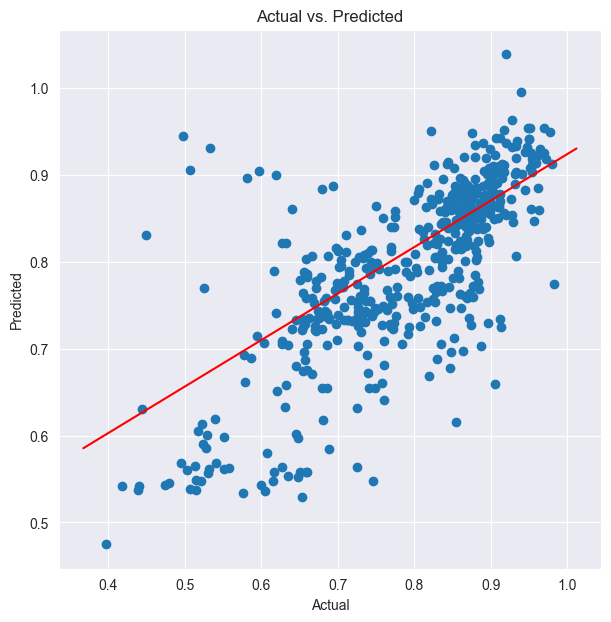

In [ ]:
# Assuming y_test and y_pred are your actual and predicted values

# Create scatter plot
sns.set_style("darkgrid")
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

# Add regression line
axes = plt.gca()
m, b = np.polyfit(y_test.iloc[:,0], y_pred[:,0], 1)
X_plot = np.linspace(axes.get_xlim()[0], axes.get_xlim()[1], 100)
plt.plot(X_plot, m*X_plot + b, '-', color='red')
plt.show()

## XGboost

In [ ]:
# XGBoost
import xgboost as xgb

from sklearn.model_selection import KFold

# Define the number of splits (k)
num_splits = 5  # You can adjust this value as needed

# get input variables and target variables
features = ['max_temp', 'min_temp', 'mean_temp', 'Mean_Precp', 'Mean_WS_log', 'spring', 'summer', 'fall', 'winter',
       'holiday']
targets = ['石化業該日最高用電量', '資訊電子該日最高用電量', '民生工業該日最高用電量']


x = data[features]
y = data[targets]

# Initialize KFold
kf = KFold(n_splits=num_splits)

# split data
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=1/3, random_state=42)

# create xgboost model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

# train model
xgb_model.fit(x_train, y_train)

# predict
y_pred = xgb_model.predict(x_test)

# evaluate
print('MSE: ', mean_squared_error(y_test, y_pred, multioutput='raw_values'))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred, multioutput='raw_values')))
print('MAE: ', mean_absolute_error(y_test, y_pred, multioutput='raw_values'))
print('R2: ', r2_score(y_test, y_pred, multioutput='raw_values'))



MSE:  [0.00351753 0.00658906 0.0120735 ]
RMSE:  [0.05930875 0.08117301 0.10987947]
MAE:  [0.04377334 0.06616267 0.07087495]
R2:  [0.45690039 0.07010531 0.56300595]


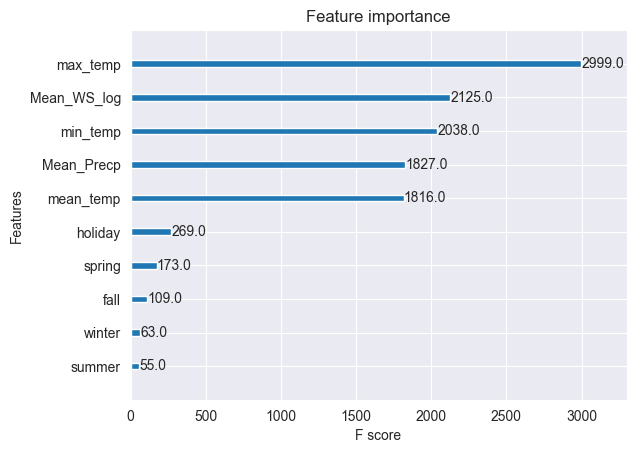

In [ ]:
# feature importance
import matplotlib.pyplot as plt
from xgboost import plot_importance

# plot feature importance
plot_importance(xgb_model)
plt.show()

## Gradient Boosting

In [ ]:
# gradient boosting
from sklearn.ensemble import GradientBoostingRegressor

# Define the number of splits (k)
num_splits = 5  # You can adjust this value as needed

# get input variables and target variables
features = ['max_temp', 'min_temp', 'mean_temp', 'Mean_Precp', 'Mean_WS_log', 'spring', 'summer', 'fall', 'winter',
       'holiday']
targets = ['石化業該日最高用電量', '金屬製造該日最高用電量', '資訊電子該日最高用電量', '綜合服務該日最高用電量', '民生工業該日最高用電量']

x = data[features]
y = data[targets]

# create gradient boosting model
gb_model = GradientBoostingRegressor(random_state=42)

for target in targets:
    # split data
    x_train, x_temp, y_train, y_temp = train_test_split(x, y[target], test_size=0.3, random_state=42)
    x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=1/3, random_state=42)
    
    # train model
    gb_model.fit(x_train, y_train)
    
    # predict
    y_pred = gb_model.predict(x_test)
    
    # evaluate
    print(target)
    print('MSE: ', mean_squared_error(y_test, y_pred, multioutput='raw_values'))
    print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred, multioutput='raw_values')))
    print('MAE: ', mean_absolute_error(y_test, y_pred, multioutput='raw_values'))
    print('R2: ', r2_score(y_test, y_pred, multioutput='raw_values'))
    print('')
    


石化業該日最高用電量
MSE:  [0.00330043]
RMSE:  [0.05744935]
MAE:  [0.0416977]
R2:  [0.49042028]

金屬製造該日最高用電量
MSE:  [0.00201877]
RMSE:  [0.04493076]
MAE:  [0.03678803]
R2:  [0.23936879]

資訊電子該日最高用電量
MSE:  [0.00586396]
RMSE:  [0.07657652]
MAE:  [0.06465925]
R2:  [0.17243581]

綜合服務該日最高用電量
MSE:  [0.00402446]
RMSE:  [0.06343862]
MAE:  [0.01128743]
R2:  [-2.112708]

民生工業該日最高用電量
MSE:  [0.00951783]
RMSE:  [0.09755934]
MAE:  [0.06234913]
R2:  [0.65550718]

